In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [26]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pickle

Populating the interactive namespace from numpy and matplotlib


In [27]:
# Read all datapoints from training and testing sets

all_file = open('/Users/jmartine/science/data/training_sets/agb_yso_data_serpens.pickle','rb')
col__3_6__4_5__serpens_agb,col__3_6__4_5__serpens_yso,col__3_6__5_8__serpens_agb,col__3_6__5_8__serpens_yso,col__5_8__8_0__serpens_agb,col__5_8__8_0__serpens_yso,col__4_5__5_8__serpens_agb,col__4_5__5_8__serpens_yso,col__4_5__8_0__serpens_agb,col__4_5__8_0__serpens_yso,col__3_6__8_0__serpens_agb,col__3_6__8_0__serpens_yso,col__3_6__serpens_agb,col__3_6__serpens_yso,col__4_5__serpens_agb,col__4_5__serpens_yso,col__5_8__serpens_agb,col__5_8__serpens_yso,col__8_0__serpens_agb,col__8_0__serpens_yso = pickle.load(all_file)

all_file = open('/Users/jmartine/science/data/training_sets/agb_yso_data_n1333.pickle','rb')
col__3_6__4_5__n1333_agb,col__3_6__4_5__n1333_yso,col__3_6__5_8__n1333_agb,col__3_6__5_8__n1333_yso,col__5_8__8_0__n1333_agb,col__5_8__8_0__n1333_yso,col__4_5__5_8__n1333_agb,col__4_5__5_8__n1333_yso,col__4_5__8_0__n1333_agb,col__4_5__8_0__n1333_yso,col__3_6__8_0__n1333_agb,col__3_6__8_0__n1333_yso,col__3_6__n1333_agb,col__3_6__n1333_yso,col__4_5__n1333_agb,col__4_5__n1333_yso,col__5_8__n1333_agb,col__5_8__n1333_yso,col__8_0__n1333_agb,col__8_0__n1333_yso = pickle.load(all_file)

all_file = open('/Users/jmartine/science/data/training_sets/agb_yso_data_ruffle.pickle','rb')
col__3_6__4_5__ruffle_agb,col__3_6__4_5__ruffle_yso,col__3_6__5_8__ruffle_agb,col__3_6__5_8__ruffle_yso,col__5_8__8_0__ruffle_agb,col__5_8__8_0__ruffle_yso,col__4_5__5_8__ruffle_agb,col__4_5__5_8__ruffle_yso,col__4_5__8_0__ruffle_agb,col__4_5__8_0__ruffle_yso,col__3_6__8_0__ruffle_agb,col__3_6__8_0__ruffle_yso,col__3_6__ruffle_agb,col__3_6__ruffle_yso,col__4_5__ruffle_agb,col__4_5__ruffle_yso,col__5_8__ruffle_agb,col__5_8__ruffle_yso,col__8_0__ruffle_agb,col__8_0__ruffle_yso = pickle.load(all_file)

all_file = open('/Users/jmartine/science/data/training_sets/agb_yso_data_reiter.pickle','rb')
col__3_6__4_5__reiter_agb,col__3_6__4_5__reiter_yso,col__3_6__5_8__reiter_agb,col__3_6__5_8__reiter_yso,col__5_8__8_0__reiter_agb,col__5_8__8_0__reiter_yso,col__4_5__5_8__reiter_agb,col__4_5__5_8__reiter_yso,col__4_5__8_0__reiter_agb,col__4_5__8_0__reiter_yso,col__3_6__8_0__reiter_agb,col__3_6__8_0__reiter_yso,col__3_6__reiter_agb,col__3_6__reiter_yso,col__4_5__reiter_agb,col__4_5__reiter_yso,col__5_8__reiter_agb,col__5_8__reiter_yso,col__8_0__reiter_agb,col__8_0__reiter_yso = pickle.load(all_file)

In [28]:
# Splitting AGBs and YSOs. Cleaning the sample. 

col__5_8__8_0__yso = append(col__5_8__8_0__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__5_8__8_0__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__3_6__4_5__yso = append(col__3_6__4_5__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__3_6__4_5__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__3_6__5_8__yso = append(col__3_6__5_8__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__3_6__5_8__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__4_5__5_8__yso = append(col__4_5__5_8__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__4_5__5_8__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__4_5__8_0__yso = append(col__4_5__8_0__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__4_5__8_0__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__3_6__8_0__yso = append(col__3_6__8_0__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__3_6__8_0__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__3_6__yso = append(col__3_6__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__3_6__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__4_5__yso = append(col__4_5__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__4_5__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__5_8__yso = append(col__5_8__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__5_8__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])
col__8_0__yso = append(col__8_0__serpens_yso[col__5_8__8_0__serpens_yso > 0.3],col__8_0__n1333_yso[col__5_8__8_0__n1333_yso > 0.3])

#plt.scatter(col__5_8__8_0__yso,col__3_6__4_5__yso)

In [29]:
# Splitting AGBs and YSOs. Cleaning the sample. 

col__5_8__8_0__agb = append(col__5_8__8_0__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__5_8__8_0__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__3_6__4_5__agb = append(col__3_6__4_5__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__3_6__4_5__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__3_6__5_8__agb = append(col__3_6__5_8__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__3_6__5_8__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__4_5__5_8__agb = append(col__4_5__5_8__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__4_5__5_8__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__4_5__8_0__agb = append(col__4_5__8_0__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__4_5__8_0__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__3_6__8_0__agb = append(col__3_6__8_0__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__3_6__8_0__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__3_6__agb = append(col__3_6__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__3_6__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__4_5__agb = append(col__4_5__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__4_5__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__5_8__agb = append(col__5_8__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__5_8__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
col__8_0__agb = append(col__8_0__reiter_agb[col__5_8__8_0__reiter_agb < 0.85],col__8_0__ruffle_agb[col__5_8__8_0__ruffle_agb < 0.85])
#plt.scatter(col__5_8__8_0__agb,col__3_6__4_5__agb)

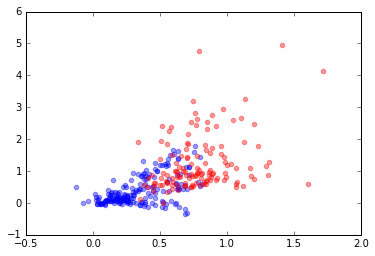

In [30]:
plt.scatter(col__5_8__8_0__agb,col__3_6__5_8__agb,color='blue',alpha=0.4)
plt.scatter(col__5_8__8_0__yso,col__3_6__5_8__yso,color='red',alpha=0.4)
#plt.scatter(col__5_8__8_0__agb,col__4_5__8_0__agb,color='orange',alpha=0.4)

In [31]:
print shape(col__5_8__8_0__agb)
print shape(col__5_8__8_0__yso)

(200,)
(134,)


In [32]:
# Select training data

size_training_set = 70

mask1 = np.ones(len(col__5_8__8_0__agb), dtype=bool)
mask2 = np.ones(len(col__5_8__8_0__yso), dtype=bool)

at1 = np.arange(len(col__5_8__8_0__agb))
at2 = np.arange(len(col__5_8__8_0__yso))

numpy.random.shuffle(at1)
it1 = at1[0:size_training_set]
numpy.random.shuffle(at2)
it2 = at2[0:size_training_set]

mask1[it1] = False
mask2[it2] = False

print shape(mask1)
print shape(mask2)

(200,)
(134,)


(130,)
(130,)
(64,)
(64,)


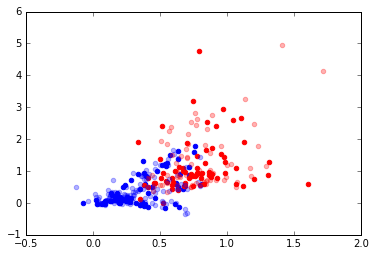

In [33]:
plt.scatter(col__5_8__8_0__agb[it1],col__3_6__5_8__agb[it1],color='blue')
plt.scatter(col__5_8__8_0__yso[it2],col__3_6__5_8__yso[it2],color='red')
plt.scatter(col__5_8__8_0__agb[mask1],col__3_6__5_8__agb[mask1],color='blue',alpha=0.3)
plt.scatter(col__5_8__8_0__yso[mask2],col__3_6__5_8__yso[mask2],color='red',alpha=0.3)
print shape(col__5_8__8_0__agb[mask1])
print shape(col__3_6__5_8__agb[mask1])
print shape(col__5_8__8_0__yso[mask2])
print shape(col__3_6__5_8__yso[mask2])

In [34]:
# TRAINING SET
# USING 4 FEATURES
# 0's are YSOs, 1's are AGBs
col_agb_train = np.array([col__5_8__8_0__agb[it1],col__3_6__5_8__agb[it1],col__4_5__5_8__agb[it1],col__4_5__8_0__agb[it1],col__3_6__4_5__agb[it1],col__3_6__8_0__agb[it1]])
col_agb_train = col_agb_train.T
col_yso_train = np.array([col__5_8__8_0__yso[it2],col__3_6__5_8__yso[it2],col__4_5__5_8__yso[it2],col__4_5__8_0__yso[it2],col__3_6__4_5__yso[it2],col__3_6__8_0__yso[it2]])
col_yso_train = col_yso_train.T
col_train = concatenate((col_agb_train,col_yso_train),axis=0)
lab_train = np.zeros(len(col_train))
lab_train[0:size_training_set] = 1
lab_train = lab_train.astype(int)
ind = arange(len(col_train))
random.shuffle(ind)
col_train = col_train[ind]
lab_train = lab_train[ind]
null_feature_train = np.zeros(140)

col_train_null = np.concatenate((transpose(col_train), [null_feature_train]), axis=0)

col_train_null = col_train_null.T

col_train = col_train_null

print shape(col_train_null)

feature_names = ['5_8__8_0','3_6__5_8','4_5__5_8','4_5__8_0','3_6__4_5','3_6__8_0','null']

(140, 7)


In [35]:
# TEST SET
# 0's are YSOs, 1's are AGBs
col_agb_test = np.array([col__5_8__8_0__agb[mask1],col__3_6__5_8__agb[mask1],col__4_5__5_8__agb[mask1],col__4_5__8_0__agb[mask1],col__3_6__4_5__agb[mask1],col__3_6__8_0__agb[mask1]])
col_agb_test = col_agb_test.T
col_yso_test = np.array([col__5_8__8_0__yso[mask2],col__3_6__5_8__yso[mask2],col__4_5__5_8__yso[mask2],col__4_5__8_0__yso[mask2],col__3_6__4_5__yso[mask2],col__3_6__8_0__yso[mask2]])
col_yso_test = col_yso_test.T
col_test = concatenate((col_agb_test,col_yso_test),axis=0)
lab_test = np.zeros(len(col_test))
lab_test[0:len(col__5_8__8_0__agb[mask1])] = 1
lab_test = lab_test.astype(int)
ind = arange(len(col_test))
random.shuffle(ind)
col_test = col_test[ind]
lab_test = lab_test[ind]
null_feature_test = np.zeros(194)

col_test_null = np.concatenate((transpose(col_test), [null_feature_test]), axis=0)

col_test_null = col_test_null.T

col_test = col_test_null

print shape(col_test_null)

#print shape(col_test),shape(lab_test)

(194, 7)


In [36]:
indu = ~isnan(col_test[:,1])
col_test = col_test[indu]
lab_test = lab_test[indu]

indu = ~isnan(col_train[:,1])
col_train = col_train[indu]
lab_train = lab_train[indu]

print shape(col_train),shape([lab_train])

(140, 7) (1, 140)


In [37]:
X = np.append(col_test,col_train,axis=0)
Y = np.append(lab_test,lab_train,axis=0)

print shape(X)
print Y[0:100]



(334, 7)
[1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1
 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1]


In [38]:
#h = .02  # step size in the mesh

#x_min, x_max = -0.5, 2.0
#y_min, y_max = -1.0, 3.5
#z_min, z_max = -1.5, 2.0
#t_min, t_max = -0.5, 2.0
#xx, yy, zz, tt = np.meshgrid(np.arange(x_min, x_max, h),
#                        np.arange(y_min, y_max, h), np.arange(z_min, z_max, h), np.arange(t_min, t_max, h))


In [39]:
# instantiate the RF learning object
IR_rf = RandomForestClassifier()


In [40]:
# parameter values over which we will search
parameters = {'n_estimators':(200,500,1000),"max_features": ["auto",3,7],
              'criterion':[str("gini"),str("entropy")],"min_samples_leaf": [1,2]}
#parameters = {'kernel':('linear', 'rbf')}


In [41]:
# do a grid search to find the highest 3-fold CV zero-one score

from sklearn import grid_search
rf_tune = grid_search.GridSearchCV(IR_rf, parameters,\
                                    n_jobs = -1, cv = 3,verbose=1)


In [42]:
rf_opt = rf_tune.fit(X, Y)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.0min finished


In [43]:
# print the best score and estimator
print(rf_opt.best_score_)
print(rf_opt.best_estimator_)


0.874251497006
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [48]:
# Let us instatiate the classifier with the obtained optimal values
IR_ref_opt = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [49]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
col_train_minmax = min_max_scaler.fit_transform(col_train)

In [50]:
col_test_minmax = min_max_scaler.transform(col_test)

In [51]:
IR_ref_opt.fit(col_train_minmax, lab_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
score = IR_ref_opt.score(col_test_minmax, lab_test)

In [53]:
score

0.865979381443299

In [54]:
sorted(zip(feature_names,IR_ref_opt.feature_importances_),key=lambda  q: q[1],reverse=True)

[('5_8__8_0', 0.38494357560826847),
 ('3_6__8_0', 0.219899447017955),
 ('4_5__8_0', 0.11195931263053961),
 ('3_6__4_5', 0.10269506304345775),
 ('3_6__5_8', 0.094712044326689337),
 ('4_5__5_8', 0.085790557373089812),
 ('null', 0.0)]

In [55]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(IR_ref_opt, X, Y, cv=5)

In [56]:
scores

array([ 0.91044776,  0.8358209 ,  0.8358209 ,  0.88059701,  0.81818182])

In [57]:
mean_sc = mean(scores)
print mean_sc
print std(scores)

0.856173677069
0.0340999367


In [58]:
h = .3  # step size in the mesh

x0_min, x0_max = -0.5, 2.0
x1_min, x1_max = -1.0, 5.5
x2_min, x2_max = -1.5, 2.0
x3_min, x3_max = 0.5, 3.5
x4_min, x4_max = -0.5, 3.5
x5_min, x5_max = 0.0, 7.0
x6_min, x6_max = -0.1, 0.1
x0x0, x1x1, x2x2, x3x3, x4x4, x5x5, x6x6 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h),
                                                      np.arange(x3_min, x3_max, h),np.arange(x4_min, x4_max, h),
                                                      np.arange(x5_min, x5_max, h),np.arange(x6_min, x6_max, h))

In [59]:
plt.figure(figsize=(6.5, 5.5))


In [ ]:
if hasattr(IR_ref_opt, "decision_function"):
    Z = IR_ref_opt.decision_function(np.c_[x0x0.ravel(), x1x1.ravel(), x2x2.ravel(),x3x3.ravel(), x4x4.ravel(), x5x5.ravel(), x6x6.ravel(),])
else:
    Z = IR_ref_opt.predict_proba(np.c_[x0x0.ravel(), x1x1.ravel(), x2x2.ravel(),x3x3.ravel(), x4x4.ravel(), x5x5.ravel(), x6x6.ravel(),])[:, 1]

(22, 9, 12, 10, 14, 24, 1)
(22, 9, 12, 10, 14, 24, 1)


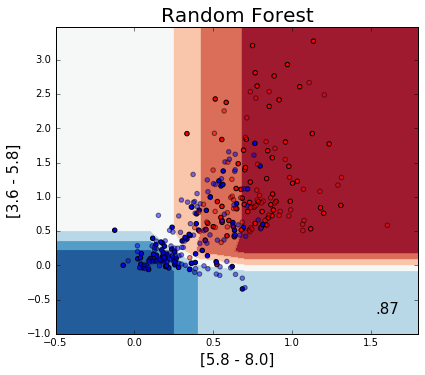

In [360]:
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
print shape(x0x0)
# Put the result into a color plot
Z = Z.reshape(x0x0.shape)
print shape(Z)

plt.figure(figsize=(6.5, 5.5))
for i in (arange(5,6)):
    for j in (arange(4,5)):
        for h in (arange(6,7)):
            for k in (arange(11,13)):
                plt.contourf(x0x0[:,:,i,j,h,k,0], x1x1[:,:,i,j,h,k,0], Z[:,:,i,j,h,k,0], cmap=cm, alpha=.8)
#plt.contourf(x0x0[:,:,5,5,5,5,0], x1x1[:,:,5,5,5,5,0], Z[:,:,5,5,5,5,0], cmap=cm, alpha=.8)

plt.scatter(col_train[:, 0], col_train[:, 1], c=lab_train, cmap=cm_bright,s=20)
    ## and testing points
plt.scatter(col_test[:, 0], col_test[:, 1], c=lab_test, cmap=cm_bright,alpha=0.5,s=20,zorder=1.0)

plt.xlim(xx.min(), 1.8)
plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())
plt.title('Random Forest',size=20)
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % mean_sc).lstrip('0'),
        size=15, horizontalalignment='right')
plt.xlabel('[5.8 - 8.0]',size=15)
plt.ylabel('[3.6 - 5.8]',size=15)